<h1>Inverse problem</h1>


I expose here how to solve the inverse probleme of reconstructiong $\alpha,\ \beta,\ a$ and $b$ from of finite number of the $u$ solution's values.
The first step is to define a grid to work with and to extract a sample of it, which will be the base for the observation set (see grid.ipynb for more details).

In [1]:
from direct_problem import Grid

grid = Grid(
    x_min=0,
    x_max=5,
    delta_x=0.2,
    t_max=1,
    delta_t=0.01
)

sample_size=200
sample = grid.random_sample(size=sample_size)


The next step is to generate a set of random parameters. Each set $\{\alpha_i,\ \beta_i,\ a_i,\ b_i\}$ will be used to define and solve a direct problem. 

Each set of solution's values with those parameters will be used to train a neural network whose objectif is to map solution's values to the parameters.

In [2]:
from data import RandomParameters

number_of_problems = 150 # This will also be the numbers of direct 
                      # problems to solve in order to generate the data.

parameters = RandomParameters(parameters_size=number_of_problems)

print(parameters)

      alpha      beta         a         b
0  0.664772  0.418035  1.158627  2.985221
1  0.550084  0.309647  1.101659  0.686741
2  0.846398  0.439760  1.781006  1.016700
3  0.404113  0.981735  2.496863  0.581807
4  0.951599  0.868926  1.512213  2.494313


In [3]:
import numpy as np

from data import DataGenerator


f = lambda x: np.maximum(2-x, 0)

data_generator = DataGenerator(grid, parameters, f)

# We build the DataLoader that will be used by pytorch

batch_size = sample_size // 10 # Arbitrary choice
train_dl, test_dl = data_generator.dataloader(batch_size=batch_size)

We are now ready to train the model.

In [4]:
from inverse_problem import get_optimized_model, fit

model, opt = get_optimized_model(sample_size, learning_rate=0.005)

epochs = 50

loss_array = fit(model, train_dl, test_dl, epochs, opt) # Also return the average validation loss at 
                                                        # each step of the training
# TODO: Re start from here and write somekind of a dashboard to visualize the whole process

Average validation loss before training: 1.983519196510315
Average validation loss after training: 0.308474063873291


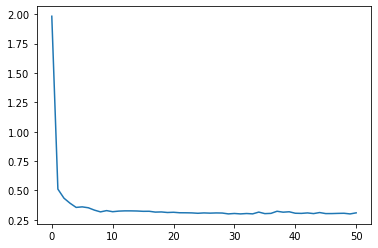

In [6]:
import matplotlib.pyplot as plt

# Visualizing the loss evolution during training
plt.plot(loss_array)